# Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
import matplotlib.pyplot as plt

In [2]:
COLOR_MAP = "Spectral"
N_SEED = 19
N_JOBS = 4

np.random.seed(N_SEED)

## Self-created dataset

**y = fx(w,b) = wx + b**

In [3]:
N_SIZE = 200

random_numbers = np.random.randn(N_SIZE) * 5

X = np.arange(N_SIZE)
X = np.reshape(X, (-1, 1)) + 1

y = np.dot(X, np.array([2])) + 7 + random_numbers

In [4]:
def plot_Xy(x, target):
    plt.scatter(x, target, color="red", s=2,)
    plt.axis([0, None, 0, None])
    ax = plt.gca()
    ax.spines["bottom"].set_color("darkblue")
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color("darkblue")
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors="darkblue")
    ax.tick_params(axis="y", colors="darkblue")
    plt.show();

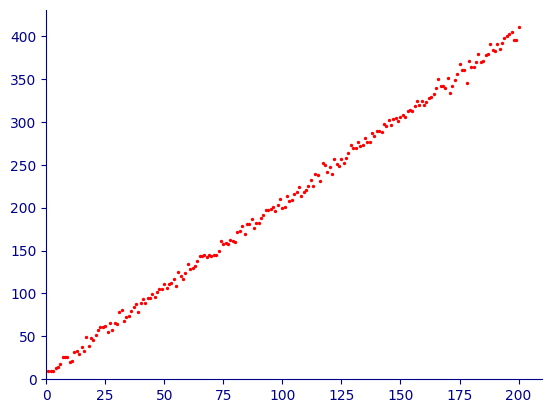

In [5]:
plot_Xy(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=N_SEED)

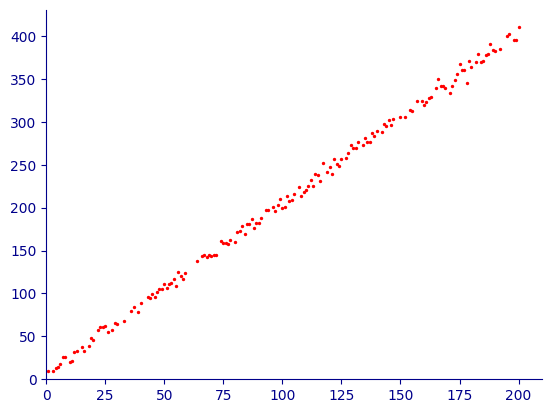

In [7]:
plot_Xy(X_train, y_train)

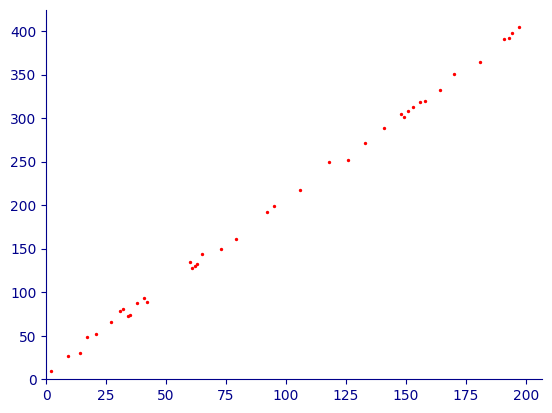

In [8]:
plot_Xy(X_test, y_test)

### Create model and fit

In [9]:
lnr_model = LinearRegression(
    n_jobs=N_JOBS
).fit(X_train, y_train)

In [10]:
lnr_model.score(X_test, y_test)

0.9987306650694989

In [11]:
lnr_model.coef_

array([1.99251272])

In [12]:
lnr_model.intercept_

np.float64(6.9119295127526925)

### Predict

In [13]:
y_pred = lnr_model.predict(X_test)

In [14]:
y_pred

array([ 88.60495111, 287.8562233 ,  74.65736206, 190.22309993,
        34.80710762, 196.20063809, 303.79632508,  48.75469667,
       399.43693573, 333.68401591,  70.67233661, 164.32043454,
        40.78464579, 367.55673218,  82.62741295, 345.63909224,
       152.36535821, 218.11827803, 311.76637596, 321.72893957,
       242.0284307 , 128.45520555, 132.44023099, 317.74391413,
       387.4818594 ,  90.59746383, 126.46269283, 393.45939756,
       271.91612153, 307.78135052,  10.89695496, 130.44771827,
        76.64987478,  68.67982389,  60.709773  , 391.46688484,
        24.84454401, 257.96853247, 136.42525644, 301.80381236])

In [15]:
y_test

array([ 93.71173914, 289.14946908,  72.58344043, 192.0183502 ,
        29.92003799, 198.64979084, 301.14550534,  51.61392873,
       404.72341815, 332.77420086,  80.58722339, 160.86536098,
        48.7777195 , 364.43233177,  87.22574233, 350.56109254,
       149.17446812, 217.81984542, 312.75035305, 319.18716624,
       249.35686456, 127.96012202, 132.37701955, 318.72172127,
       391.14111097,  89.24368035, 134.74381094, 398.27964093,
       271.32877072, 308.04644113,   9.29767496, 129.79162969,
        73.77459926,  78.89204375,  66.02792549, 392.42376269,
        26.26206868, 252.24812934, 143.54406223, 304.72452686])

In [16]:
mean_squared_error(y_test, y_pred)

np.float64(18.928569759632417)

In [17]:
mean_absolute_error(y_test, y_pred)

np.float64(3.4240332729745857)